<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/play_tennis_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving play_tennis.csv to play_tennis.csv


In [ ]:
import pandas as pd
df=pd.read_csv("play_tennis.csv")

In [ ]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [ ]:
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [ ]:
df['day'].unique()

array(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14'], dtype=object)

In [ ]:
df['humidity'].unique()

array(['High', 'Normal'], dtype=object)

In [ ]:
df['outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [ ]:
df['temp'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [ ]:
df['wind'].unique()

array(['Weak', 'Strong'], dtype=object)

In [ ]:
df['play'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['wind']=le.fit_transform(df['wind'])
df['day']=le.fit_transform(df['day'])
df['temp']=le.fit_transform(df['temp'])
df['wind']=le.fit_transform(df['wind'])
df['outlook']=le.fit_transform(df['outlook'])
df['humidity']=le.fit_transform(df['humidity'])
df['play']=le.fit_transform(df['play'])

In [ ]:
df

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [ ]:
df=df.drop('day',axis=1)

##KMeans

In [ ]:
from sklearn.cluster import KMeans
wss = []
for k in range(1,15):
  model = KMeans(n_clusters=k, init='k-means++', random_state = 0)
  model.fit(df)
  wss.append(model.inertia_)

In [ ]:
wss

[28.785714285714285,
 18.541666666666664,
 12.95,
 10.5,
 8.583333333333332,
 6.333333333333333,
 4.833333333333334,
 3.833333333333333,
 2.833333333333333,
 2.0,
 1.5,
 1.0,
 0.5,
 0.0]

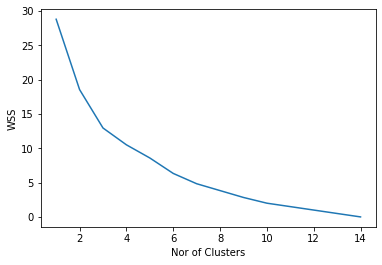

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),wss)
plt.xlabel('Nor of Clusters')
plt.ylabel('WSS')
plt.show()

In [ ]:
k=10

In [ ]:
model = KMeans(n_clusters=k, init='k-means++')
model.fit(df)
pred = model.predict(df)
pred

array([7, 7, 0, 4, 2, 9, 3, 1, 2, 4, 6, 8, 0, 5], dtype=int32)

##Hierarchial

In [ ]:
from scipy.cluster import hierarchy
x = hierarchy.linkage(df,method='ward')

In [ ]:
import matplotlib.pyplot as plt


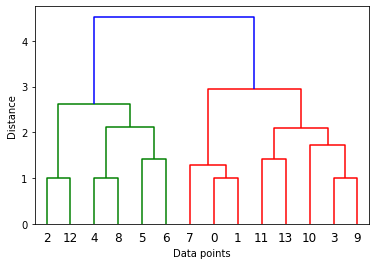

In [ ]:
den = hierarchy.dendrogram(x)
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [ ]:
k=2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=k)
pred = model.fit_predict(df)

In [ ]:
pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=5,min_samples=3)

In [ ]:
model.fit(df)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
m = set(model.labels_)

In [ ]:
m

{0}

In [ ]:
k = len(m)

k

1

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=k)
pred = model.fit_predict(df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])